In [56]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

from astropy import units as u
from astropy import constants as const

from astropy.coordinates import SkyCoord
from astropy.time import Time

from astropy.visualization import quantity_support


In [45]:
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7ff2a8805240>

In [5]:
angledeg = 30 * u.deg
angledeg

<Quantity 30. deg>

In [6]:
anglerad = np.pi/6 * u.rad
anglerad

<Quantity 0.52359878 rad>

In [8]:
np.sin(angledeg)

<Quantity 0.5>

## (3) Equation (1)

### $\eta = \frac{\lambda}{2c} | A_e \sin{( \phi_e - \chi_e)} + A_p \sin{(\phi_p - \chi_p)} + C |^{-1}$

#### First lets check the orders of magnitude when both A, phi and chi are in the same order of magnitude ~1

Text(0.5, 0, 'time (a.u.)')

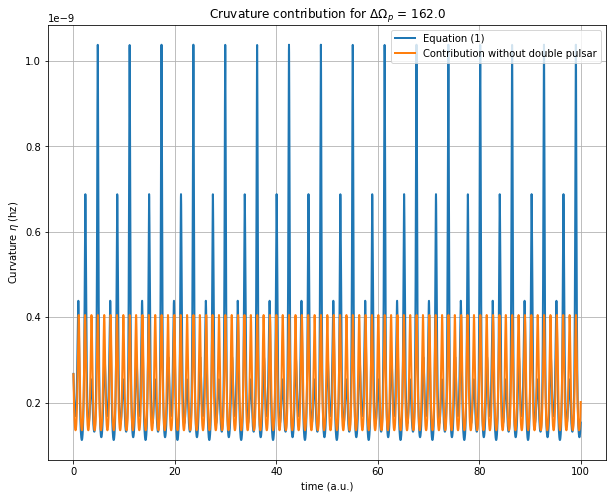

In [26]:
Ae = 1.5
xe = 0.5
we = 5

wp = 3
C = 3

t = np.linspace(0,100,10000)

f = 820 *u.MHz#in mhz

Mhz2m = 299 * u.m * u.MHz
l = Mhz2m / f# in m
c = 3e8 #in m/s

DO = 0.9*np.pi
xp , Ap = orbital_params(DO, 1, 1, 1, ip[0])
#orbital_params(DO, dp, Kp ,deff, ip)

def curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe ):
    eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) ** -1
    eta2 = l/(2*c) * np.abs( Ae * np.sin(we*t - xe)  + C ) ** -1
    return eta, eta2

plt.figure(figsize = (10,8))

plt.plot(t,curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe )[0], label = "Equation (1)", lw = 2)
plt.plot(t,curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe )[1] , label = "Contribution without double pulsar", lw = 2)
plt.grid(); plt.legend()

plt.title("Cruvature contribution for " + "$\Delta \Omega_p$ = " + str(DO * 180 / np.pi))
plt.ylabel('Curvature ' + '$\eta$' + ' (hz)', )
plt.xlabel( 'time (a.u.)')

<IPython.core.display.Javascript object>


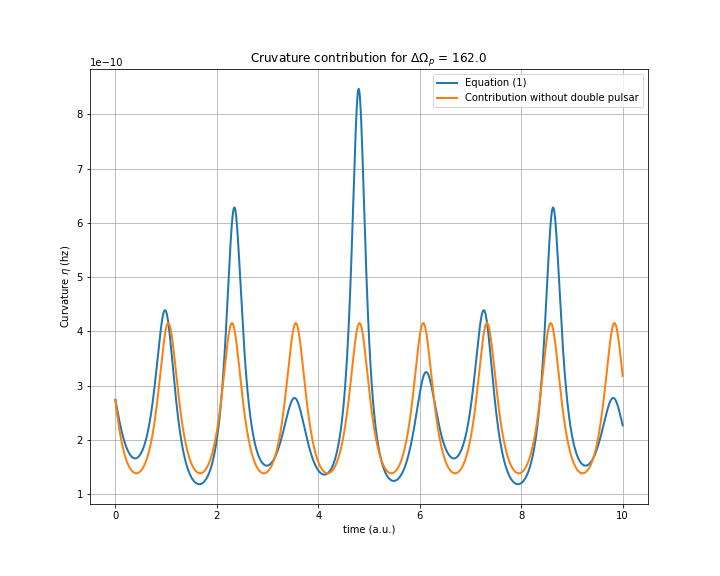

Text(0.5, 0, 'time (a.u.)')

In [32]:
Ae = 1.5
xe = 0.5
we = 5

wp = 3
C = 3

t = np.linspace(0,10,10000)

f = 800 *u.MHz#in mhz

Mhz2m = 299 * u.m * u.MHz
l = Mhz2m / f# in m
c = 3e8 #in m/s

DO = 0.9*np.pi
xp , Ap = orbital_params(DO, 1, 1, 0.7, ip[0])
#orbital_params(DO, dp, Kp ,deff, ip)

def curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe ):
    eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) ** -1
    eta2 = l/(2*c) * np.abs( Ae * np.sin(we*t - xe)  + C ) ** -1
    return eta, eta2

plt.figure(figsize = (10,8))

plt.plot(t,curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe )[0], label = "Equation (1)", lw = 2)
plt.plot(t,curvature (t, l, c, C, wp, we, Ap, Ae, xp, xe )[1] , label = "Contribution without double pulsar", lw = 2)
plt.grid(); plt.legend()

plt.title("Cruvature contribution for " + "$\Delta \Omega_p$ = " + str(DO * 180 / np.pi))
plt.ylabel('Curvature ' + '$\eta$' + ' (hz)', )
plt.xlabel( 'time (a.u.)')

<IPython.core.display.Javascript object>


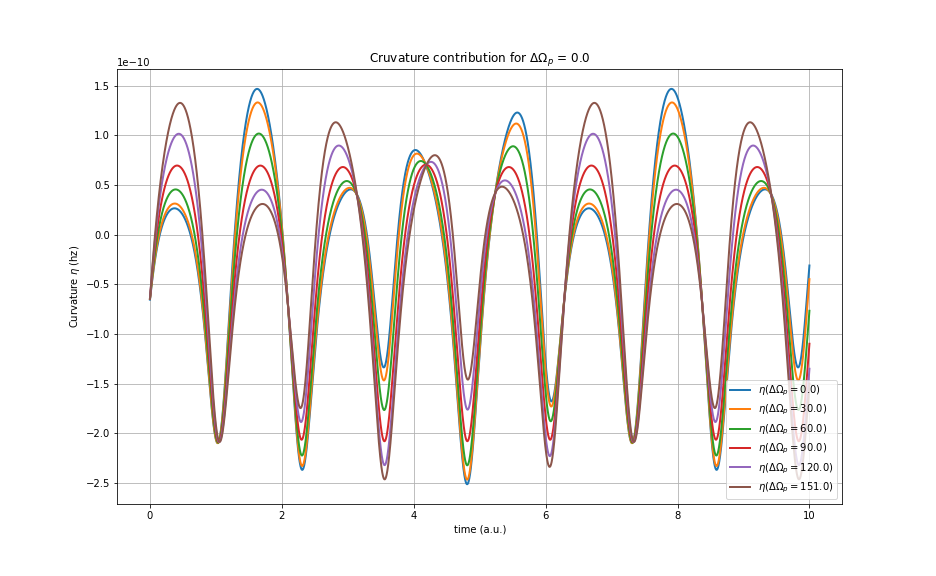

In [34]:
d = np.pi/180 * np.array([0, 30, 60, 90, 120, 150])
DO = 0

%matplotlib nbagg
def curvature2 (t, l, c, C, wp, we, Ae, xe, d1, DO ):
    xp , Ap = orbital_params(DO + d1, 1, 1, 0.7, ip[0])
    #orbital_params(DO, dp, Kp ,deff, ip)
    eta = l/(2*c) * np.abs( Ap * np.sin( wp * t - xp) + C ) **(-1)
    return eta

plt.figure(figsize = (13,8))

t = np.linspace(0,10,10000)
#xp , Ap = orbital_params(DO, 1, 1, 1, ip[0])
#eta = l/(2*c) * np.abs( Ae * np.sin(we*t - xe) + Ap * np.sin( wp * t - xp) + C ) **(-1)
#plt.plot(t,eta, label = "$\eta( \Delta \Omega_p = $" + str(DO * 180/np.pi) + ")", lw = 2)

for i in range(0, len(d)):
    #plt.plot(t,curvature2 (t, l, c, C, wp, we, Ae, xe, d, DO )[1] , label = "$\eta( \Delta \Omega_p = $" + str((DO + d) * 180/np.pi) + ")", lw = 2)
    eta2 = curvature2(t, l, c, C, wp, we, Ae, xe, d[i], DO ) - l/(2*c) * np.abs( Ae * np.sin(we*t - xe)  + C )**(-1)
    plt.plot(t,eta2, label = "$\eta( \Delta \Omega_p = $" + str(np.ceil((DO + d[i])*180/np.pi))+ ")", lw = 2)
    
plt.grid() 
plt.legend()
plt.title("Cruvature contribution for " + "$\Delta \Omega_p$ = " + str(np.ceil(DO * 180 / np.pi)))
plt.ylabel('Curvature ' + '$\eta$' + ' (hz)', )
plt.xlabel( 'time (a.u.)')
plt.savefig("curvatures1.png")

In [179]:
##Double Pulsar Parameters--------------------------------------------------------------------------

dp = 1 * u.kpc #distance to the pulsar in kpc (estimate to a 1kpc fit)
deff = 0.7*dp  #effective distance (taken as 0.7 of dp)

d2s = 86400 * u.s / u.d
km2m = 1e3 * u.km / u.m

##realistic values from Rickett
p_orb_p = (0.10225) * u.day   #orbital period in day
asini_p = (1.41502860) * const.c * u.s   #projected semimajor axis in light seconds


Kp = 2.*np.pi * asini_p / p_orb_p     #pulsar radial velocity amplitude

DO = 0

xp, Ap = orbital_params(DO, dp, Kp, deff, ip[0])



##Earths parameters----------------------------------------------------------------------------------

p_orb_e = 1. * u.yr   #orbital period in yr
asini_e = 1. * u.au   #semimajor axis in a.u. 

yr2day = 365 * u.day / u.yr
au2m = const.au / u.au

Ke = 2.*np.pi * (asini_e * au2m)/ (p_orb_e * yr2day)    #earth radial velocity amplitude

psr_coord_eclip = psr_coord.barycentricmeanecliptic
ascnod_eclip = SkyCoord(lon=psr_coord_eclip.lon - 90.*u.deg, lat=0.*u.deg,
                        frame='barycentricmeanecliptic')
ascnod_equat = ascnod_eclip.icrs


xe = (65.14 * u.deg + [0., 180.] * u.deg) % (360.*u.deg)
be = np.sqrt(  (1 - np.sin(ie)**2) / (1 - np.sin(ie)**2 * np.sin(xe[0])**2 )   )
Ae = Ke / np.sqrt(deff) * be 


#Constant C---------------------------------------------------------------------------------------------
C = 1e0 * (u.m / u.day / u.kpc**(1/2))


t = np.linspace(0,5,10000) * u.day
phie = t / p_orb_e * (1/365) * (u.yr / u.day * u.rad)
phip = t / p_orb_p * u.rad

In [180]:
#useful conversions
Mhz2m = 299 * u.m * u.MHz
kpc2m = 3.086e19 * u.m / u.kpc
d2s = 86400 * u.s / u.day

In [181]:
np.sin(xe)

<Quantity [ 0.90733773, -0.90733773]>

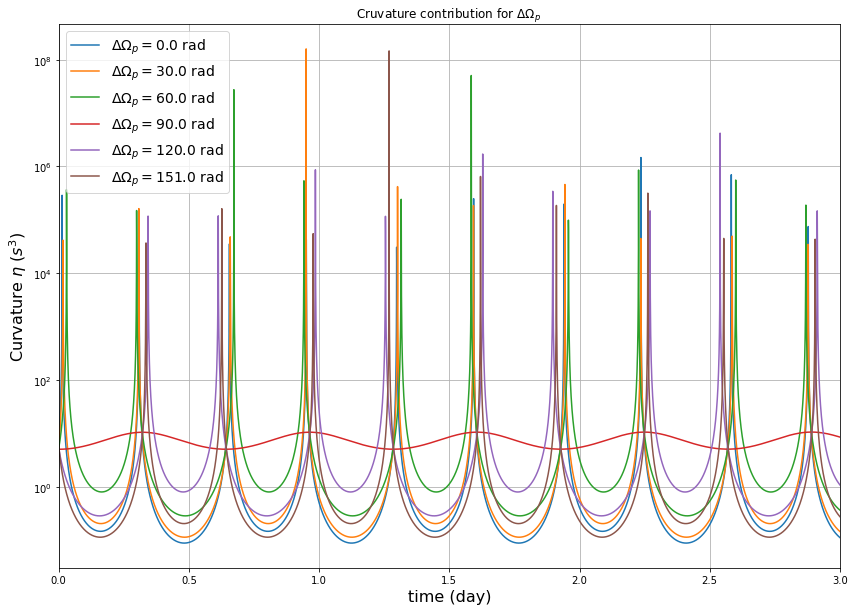

In [198]:
##Frequency and curvature plots


f = 800 *u.MHz#in mhz

l = Mhz2m / f # lambda, wavelength in m

plt.figure(figsize=(14,10))
DO = np.array([0,30,60,90,120,150]) * np.pi / 180 * u.rad

for i in range(len(DO)):
    xp, Ap = orbital_params(DO[i], dp, Kp, deff, ip[0])
    eta = l**2 / (2*const.c) * kpc2m * d2s**2 * np.abs(Ap * np.sin(phip-xp) + Ae * np.sin(phie-xe[0]) + C )**(-2)
    plt.plot(t,eta, label = '$\Delta \Omega _p = $' + str(np.ceil(  DO[i] * 180 / np.pi  )))

plt.grid() 

plt.title("Cruvature contribution for " + "$\Delta \Omega_p$ " )
plt.legend(fontsize=14)
plt.ylabel('Curvature ' + '$\eta$' + ' $(s^3)$', fontsize=16)
plt.xlabel( 'time (day)', fontsize=16)
plt.yscale('log')
plt.xlim([0,3])
plt.savefig("curvatures2.png")

In [96]:
asini_p = (1.41502860) * const.c * u.s
asini_p

<Quantity 4.24214902e+08 m>

In [108]:
t

<Quantity [  0.        ,   0.36536537,   0.73073073,   1.0960961 ,
             1.46146146,   1.82682683,   2.19219219,   2.55755756,
             2.92292292,   3.28828829,   3.65365365,   4.01901902,
             4.38438438,   4.74974975,   5.11511512,   5.48048048,
             5.84584585,   6.21121121,   6.57657658,   6.94194194,
             7.30730731,   7.67267267,   8.03803804,   8.4034034 ,
             8.76876877,   9.13413413,   9.4994995 ,   9.86486486,
            10.23023023,  10.5955956 ,  10.96096096,  11.32632633,
            11.69169169,  12.05705706,  12.42242242,  12.78778779,
            13.15315315,  13.51851852,  13.88388388,  14.24924925,
            14.61461461,  14.97997998,  15.34534535,  15.71071071,
            16.07607608,  16.44144144,  16.80680681,  17.17217217,
            17.53753754,  17.9029029 ,  18.26826827,  18.63363363,
            18.998999  ,  19.36436436,  19.72972973,  20.0950951 ,
            20.46046046,  20.82582583,  21.19119119,  21.55655

In [86]:
xp, Ap = orbital_params(DO, dp, Kp, deff, ip[0])

In [102]:
xe = (65.14 * u.deg + [0., 180.] * u.deg) % (360.*u.deg)
np.sin(xe)**2

<Quantity [0.82326176, 0.82326176]>

In [88]:
Ap

<Quantity 2.18154922e+10 m / (d kpc(1/2))>

In [104]:
Ae

<Quantity 3.0339569e+09 m / (d kpc(1/2))>

In [106]:
C = 1e8 * (u.m / u.day / u.kpc**(1/2))
C

<Quantity 1.e+08 m / (d kpc(1/2))>

In [73]:
ip[0]

<Quantity 1.54793251 rad>

In [65]:
p_orb_e = 1. * u.yr
t_eqx = Time('2005-03-21 12:33', format='iso', scale='utc')

psr_coord = SkyCoord('04h37m15.99744s -47d15m09.7170s')

psr_coord_eclip = psr_coord.barycentricmeanecliptic

t_asc_e = t_eqx + (psr_coord_eclip.lon + 90.*u.deg).to_value(u.cycle) * p_orb_e

t_asc_e

<Time object: scale='utc' format='iso' value=2005-08-11 00:57:54.451>

In [53]:
Ae

<Quantity 7.50984284 AU / (kpc(1/2) yr)>

In [47]:
p_orb_e = 1. * u.yr
a_e = 1. * u.au

v_0_e = 2.*np.pi * a_e / p_orb_e

psr_coord_eclip = psr_coord.barycentricmeanecliptic
ascnod_eclip = SkyCoord(lon=psr_coord_eclip.lon - 90.*u.deg, lat=0.*u.deg,
                        frame='barycentricmeanecliptic')
ascnod_equat = ascnod_eclip.icrs

i_e = psr_coord_eclip.lat + 90.*u.deg
omega_e = psr_coord.position_angle(ascnod_equat)

In [50]:
v_0_e


<Quantity 6.28318531 AU / yr>

## (2) $ \Delta \Omega_p$ as a function of $\chi_p$

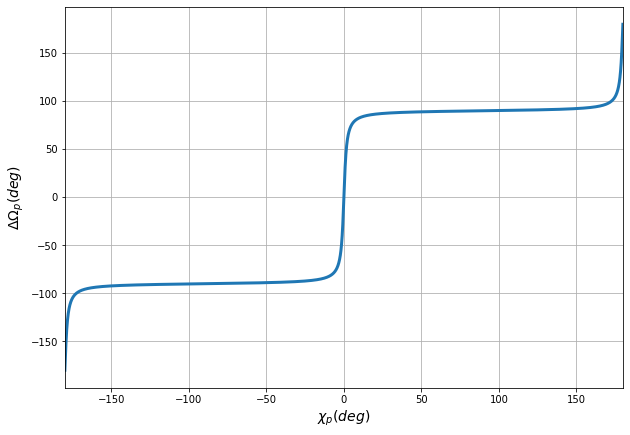

In [13]:
fntsize = 14;

#chi_p
xp = np.arange(-180,180.1,0.1) / 180 * np.pi * u.rad

#Delta Omega_p
DO = np.arctan2(np.sin(xp)/ np.cos(ip[0]), np.cos(xp)) 

#rad to degree
r2d = 180 / np.pi * u.deg / u.rad

plt.figure(figsize=(10,7))
plt.plot(xp * r2d, DO * r2d , lw = 3)
plt.xlabel('$\chi_p (deg) $', fontsize = fntsize)
plt.ylabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)
plt.xlim([-180, 180])

plt.grid(); 

#plt.savefig("DO of chip.jpg")

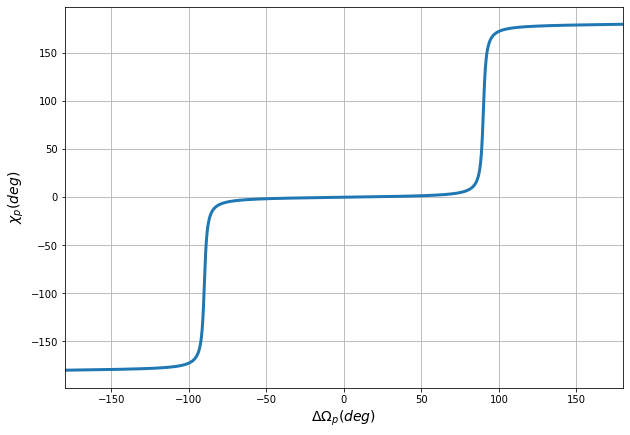

In [16]:
#Inverting the function so its chip as a function of delta omega

plt.figure(figsize=(10,7))
plt.plot(DO * r2d, xp * r2d , lw = 3)
plt.ylabel('$\chi_p (deg) $', fontsize = fntsize)
plt.xlabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)
plt.xlim([-180, 180])
plt.grid(); 

### Interpolating

In [17]:
from scipy import interpolate
xpDO = interpolate.interp1d(DO, xp)


In [18]:
DOi = np.linspace(-179.99, 179.99, 1000) * u.deg / r2d


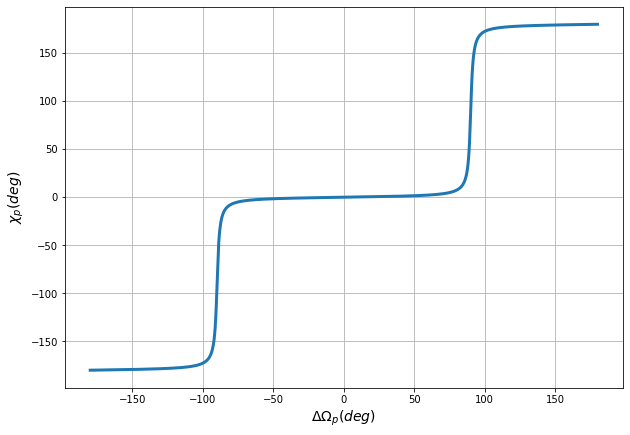

In [21]:
plt.figure(figsize=(10,7))
plt.plot(DOi * r2d, xpDO(DOi) * r2d , lw = 3)
plt.ylabel('$\chi_p (deg) $', fontsize = fntsize)
plt.xlabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)

plt.grid(); 

#plt.savefig("chip of DO.jpg")

## Finding $A_p$ and $\chi_p$ first

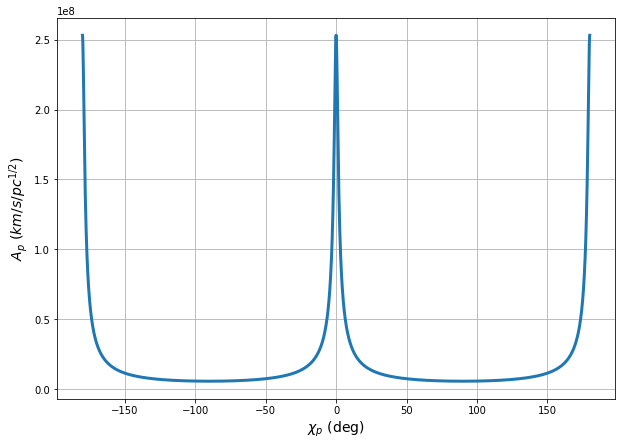

In [22]:
%matplotlib inline
plt.figure(figsize=(10,7))


dp = 1 * u.kpc
deff = 0.7*dp

d2s = 86400 * u.s / u.d
km2m = 1e3 * u.km / u.m

##realistic values from Rickett
p_orb_p = 0.102 * u.day
asini_p = 1.41502860 * const.c * u.s

Kp = 2.*np.pi * asini_p / p_orb_p / d2s * km2m

A = Kp * np.sqrt(deff) /  (dp * np.sin(ip[0])) * np.sqrt( (1 - np.sin(ip[0])**2) / (1 - np.sin(ip[0])**2 * np.cos(xp)**2 )  )

plt.plot(xp * 180 / np.pi, A, lw=3)
plt.xlabel('$\chi_p$' + " (deg)", fontsize = fntsize)
plt.ylabel('$A_p$' + " $(km/s/pc^{1/2})$", fontsize = fntsize)
#plt.yscale('log');
plt.grid()

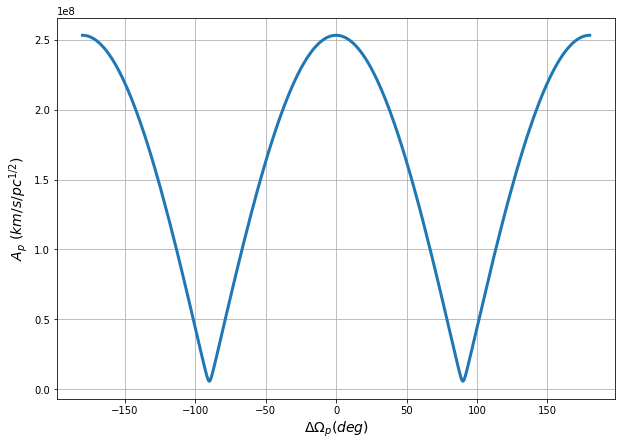

In [23]:
%matplotlib inline
plt.figure(figsize=(10,7))

# plt.plot(DOi * r2d, xpDO(DOi) * r2d , lw = 3)

A = Kp * np.sqrt(deff) /  (dp * np.sin(ip[0])) * np.sqrt( (1 - np.sin(ip[0])**2) / (1 - np.sin(ip[0])**2 * np.cos(xpDO(DOi))**2 )  )

plt.plot(DOi * r2d, A, lw = 3)
plt.xlabel('$\Delta \Omega _p (deg)$', fontsize = fntsize)
plt.ylabel('$A_p$' + " $(km/s/pc^{1/2})$", fontsize = fntsize)
# plt.yscale('log');
plt.grid()

In [84]:
def orbital_params(DO, dp, Kp ,deff, ip):
    #Function to output chi and A from the input distance, and delta omega, given deff and K
    #take DO in radians
    xp = xpDO(DO) * u.rad
    A = Kp * np.sqrt(deff) /  (dp * np.sin(ip)) * np.sqrt( (1 - np.sin(ip)**2) / (1 - np.sin(ip)**2 * np.cos(xp)**2 )  )
    
    return xp, A 

In [25]:
orbital_params(np.pi/2, dp, Kp ,deff, ip[0]) 



(array(1.57079633), <Quantity 5786623.72974553 km / (kpc(1/2) s)>)

## (1) Inclination angle

In [10]:
#Initial parameters
#inclination angle
ip = np.array([88.69, 91.31]) / 180 * np.pi * u.rad;
np.sin(ip)

<Quantity [0.99973863, 0.99973863]>

In [11]:
np.cos(ip)

<Quantity [ 0.02286182, -0.02286182]>

Text(0, 0.5, '$\\Delta \\Omega _p$')

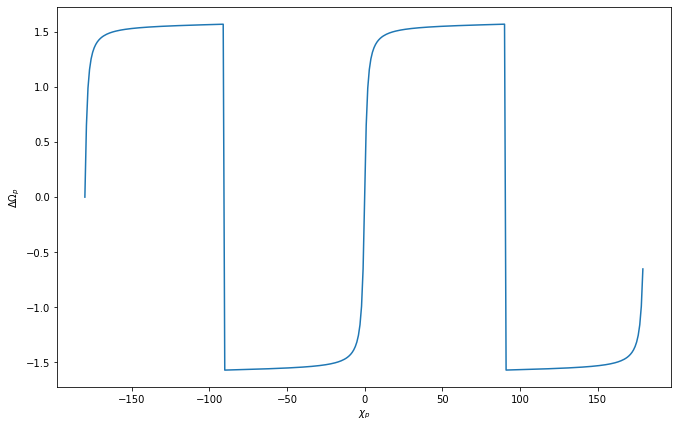

In [12]:
plt.figure(figsize=(11,7))
xp = np.arange(-180,180,1) / 180 * np.pi * u.rad
DO = np.arctan(np.tan(xp)/ np.cos(ip[0]))
plt.plot(xp * 180 / np.pi * u.deg, DO)
plt.xlabel('$\chi_p$')
plt.ylabel('$\Delta \Omega _p$')